# Ditto Insurance Analysis

Our client Ditto, an Insurance company, has provided Health Insurance to its customers and now needs help in analyzing whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company

## Data Pre-Processing Report 

##### Import all required libraries and read the data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.ticker as mtick

In [15]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Ditto_Insurance.csv')

##### Check for the null Values

In [16]:
df.isnull().sum()

id                         0
Gender                     0
Age in Years               0
Driving_License_flag       0
Area_code                  0
Previously_Insured_flag    0
Vehicle_Age                0
Vehicle_Damage_boolean     0
Annual_Premium_cost        0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### Check for duplicated rows

In [17]:
df[df.duplicated(['Gender', 'Age in Years', 'Driving_License_flag', 'Area_code', 'Previously_Insured_flag','Vehicle_Age', 
                                       'Vehicle_Damage_boolean', 'Annual_Premium_cost', 'Policy_Sales_Channel', 'Vintage', 'Response'])]

,id,Gender,Age in Years,Driving_License_flag,Area_code,Previously_Insured_flag,Vehicle_Age,Vehicle_Damage_boolean,Annual_Premium_cost,Policy_Sales_Channel,Vintage,Response
35754,35755,Male,23,1,15,0,< 1 Year,No,2630,152,173,0
41515,41516,Male,39,1,30,0,1-2 Year,Yes,2630,124,27,0
43618,43619,Male,40,1,28,1,1-2 Year,No,2630,124,209,0
44049,44050,Male,39,1,28,0,1-2 Year,Yes,2630,124,64,0
44203,44204,Male,44,1,28,0,> 2 Years,Yes,2630,124,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...
379273,379274,Male,58,1,30,1,1-2 Year,No,2630,152,150,0
379451,379452,Male,41,1,30,0,1-2 Year,Yes,2630,156,111,0
379788,379789,Male,38,1,28,1,1-2 Year,No,2630,124,42,0
380673,380674,Female,37,1,28,0,1-2 Year,Yes,2630,156,176,0


##### Checking How many duplicated rows we have

In [18]:
No_of_duplicated_rows=df[df.duplicated(['Gender', 'Age in Years', 'Driving_License_flag', 'Area_code', 'Previously_Insured_flag','Vehicle_Age', 
                                       'Vehicle_Damage_boolean', 'Annual_Premium_cost', 'Policy_Sales_Channel', 'Vintage', 'Response'])]
No_of_duplicated_rows.shape[0]

269

##### There are 269 Duplicated Rows

##### Add some new Column As per requirement

##### Adding Age Group column and vehicle age category

In [53]:
def age_group(age):
    if age < 26:
        return 'Very Young'
    elif 26 <= age <= 40:
        return 'Young'
    elif 41 <= age <= 60:
        return 'Middle-Aged'
    else:
        return 'Senior'


In [54]:
df['Age_Group'] = df['Age in Years'].apply(age_group)

In [55]:
vehicle_age_map = {'< 1 Year': '0', '1-2 Year': '1', '> 2 Years': '2'}
df['Vehicle Age Category'] = df['Vehicle_Age'].map(vehicle_age_map)

In [56]:
df.head()

,id,Gender,Age in Years,Driving_License_flag,Area_code,Previously_Insured_flag,Vehicle_Age,Vehicle_Damage_boolean,Annual_Premium_cost,Policy_Sales_Channel,Vintage,Response,Age_Group,Vehicle Age Category
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,Middle-Aged,2
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,Senior,1
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,Middle-Aged,2
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,Very Young,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,Young,0


##### saving Total Number of rows in one variable

In [12]:
total_row=df.shape[0]
print(total_row)

381109


##### Checked For Imbalance Data

##### Checking For Driving_License

Very Few People Dont have Driving License

In [57]:
df['Driving_License_flag'].value_counts()

Driving_License_flag
1    380297
0       812
Name: count, dtype: int64

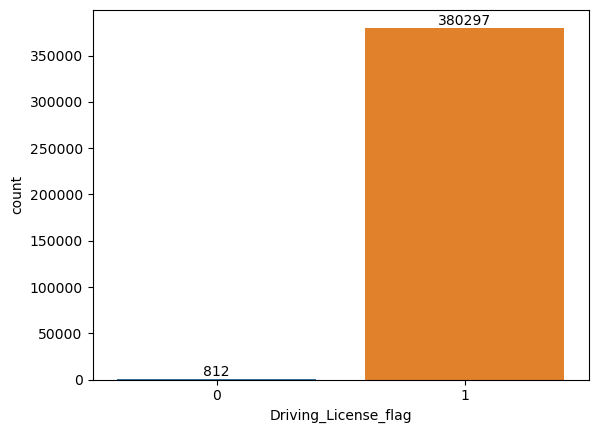

In [59]:
graph=sns.countplot(x='Driving_License_flag',data=df)
for container in graph.containers:
    graph.bar_label(container)

##### Checking For Previously Insured

In [60]:
df['Previously_Insured_flag'].value_counts()

Previously_Insured_flag
0    206481
1    174628
Name: count, dtype: int64

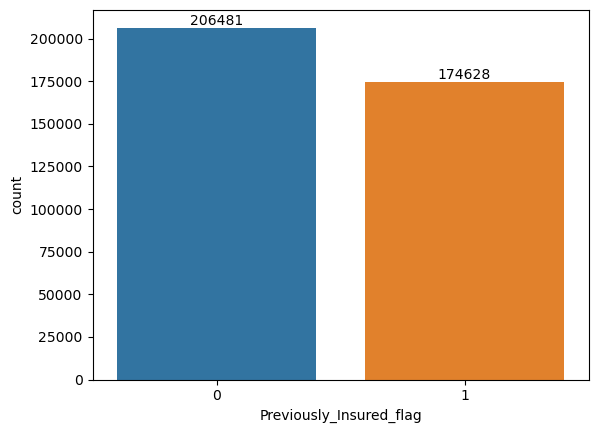

In [61]:
graph=sns.countplot(x='Previously_Insured_flag',data=df)
for container in graph.containers:
    graph.bar_label(container)

##### Checking For Reponse

In [62]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

##### Finding percentage of people who responded.(12% People responded)

In [63]:
Total_response_rows=df[df['Response']==1]
total_response_percentage=Total_response_rows.shape[0]
total_response_percentage=(total_response_percentage/total_row)*100
print(total_response_percentage)

12.256336113815209


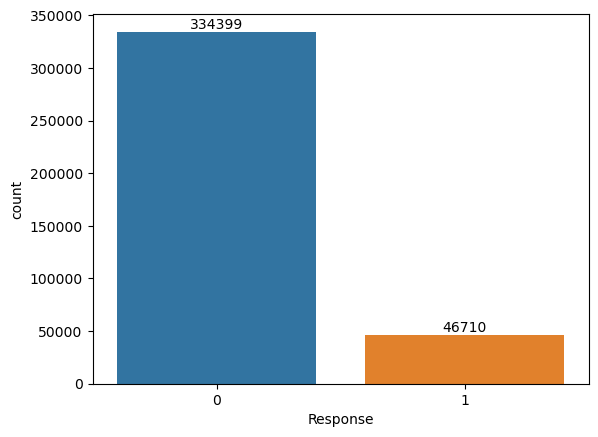

In [64]:
graph=sns.countplot(x='Response',data=df)
for container in graph.containers:
    graph.bar_label(container)

##### Checking For vehicle damage

In [65]:
df['Vehicle_Damage_boolean'].value_counts()


Vehicle_Damage_boolean
Yes    192413
No     188696
Name: count, dtype: int64

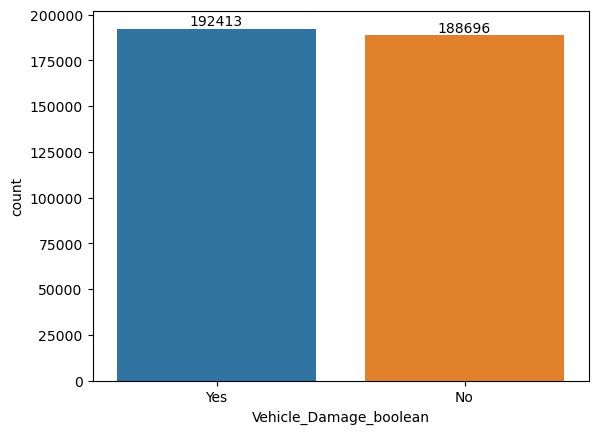

In [66]:
graph=sns.countplot(x='Vehicle_Damage_boolean',data=df)
for container in graph.containers:
    graph.bar_label(container)

##### Checking For vehicle age (very few policy holder's vehicle is for more than 2 yr.)

In [67]:
df['Vehicle Age Category'].value_counts()

Vehicle Age Category
1    200316
0    164786
2     16007
Name: count, dtype: int64

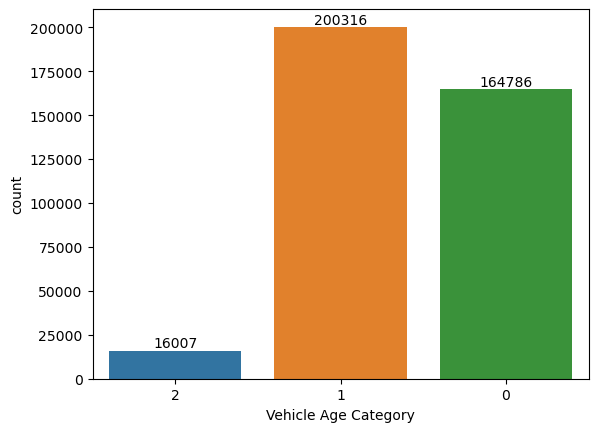

In [68]:
graph=sns.countplot(x='Vehicle Age Category',data=df)
for container in graph.containers:
    graph.bar_label(container)

##### Checking of which age most of policy holders are

In [69]:
df['Age in Years'].value_counts()

Age in Years
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64

In [70]:
df['Age_Group'].value_counts()

Age_Group
Middle-Aged    121246
Very Young     114505
Young          102119
Senior          43239
Name: count, dtype: int64

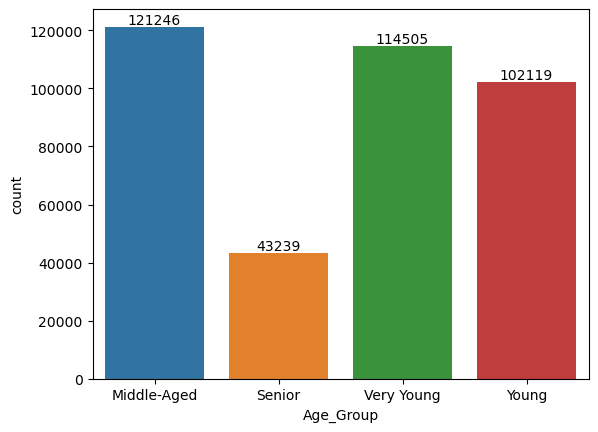

In [71]:
graph=sns.countplot(x='Age_Group',data=df)
for container in graph.containers:
    graph.bar_label(container)

## EDA Report

#### Check The Shape of Data

In [72]:
df.shape

(381109, 14)

#### Find Data Types Of all columns.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       381109 non-null  int64 
 1   Gender                   381109 non-null  object
 2   Age in Years             381109 non-null  int64 
 3   Driving_License_flag     381109 non-null  int64 
 4   Area_code                381109 non-null  int64 
 5   Previously_Insured_flag  381109 non-null  int64 
 6   Vehicle_Age              381109 non-null  object
 7   Vehicle_Damage_boolean   381109 non-null  object
 8   Annual_Premium_cost      381109 non-null  int64 
 9   Policy_Sales_Channel     381109 non-null  int64 
 10  Vintage                  381109 non-null  int64 
 11  Response                 381109 non-null  int64 
 12  Age_Group                381109 non-null  object
 13  Vehicle Age Category     381109 non-null  object
dtypes: int64(9), object(

#### Find statistical summary of data.

In [74]:
df.describe().round(1)

,id,Age in Years,Driving_License_flag,Area_code,Previously_Insured_flag,Annual_Premium_cost,Policy_Sales_Channel,Vintage,Response
count,381109.0,381109.0,381109.0,381109.0,381109.0,381109.0,381109.0,381109.0,381109.0
mean,190555.0,38.8,1.0,26.4,0.5,30564.4,112.0,154.3,0.1
std,110016.8,15.5,0.0,13.2,0.5,17213.2,54.2,83.7,0.3
min,1.0,20.0,0.0,0.0,0.0,2630.0,1.0,10.0,0.0
25%,95278.0,25.0,1.0,15.0,0.0,24405.0,29.0,82.0,0.0
50%,190555.0,36.0,1.0,28.0,0.0,31669.0,133.0,154.0,0.0
75%,285832.0,49.0,1.0,35.0,1.0,39400.0,152.0,227.0,0.0
max,381109.0,85.0,1.0,52.0,1.0,540165.0,163.0,299.0,1.0


In [75]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage_boolean,Age_Group,Vehicle Age Category
count,381109,381109,381109,381109,381109
unique,2,3,2,4,3
top,Male,1-2 Year,Yes,Middle-Aged,1
freq,206089,200316,192413,121246,200316


In [76]:
df.head()

,id,Gender,Age in Years,Driving_License_flag,Area_code,Previously_Insured_flag,Vehicle_Age,Vehicle_Damage_boolean,Annual_Premium_cost,Policy_Sales_Channel,Vintage,Response,Age_Group,Vehicle Age Category
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,Middle-Aged,2
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,Senior,1
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,Middle-Aged,2
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,Very Young,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,Young,0


In [77]:
df.tail()

,id,Gender,Age in Years,Driving_License_flag,Area_code,Previously_Insured_flag,Vehicle_Age,Vehicle_Damage_boolean,Annual_Premium_cost,Policy_Sales_Channel,Vintage,Response,Age_Group,Vehicle Age Category
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0,Senior,1
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0,Young,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0,Very Young,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0,Senior,2
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0,Middle-Aged,1


## Understanding Data Through Visualisation

### Univariate Analysis

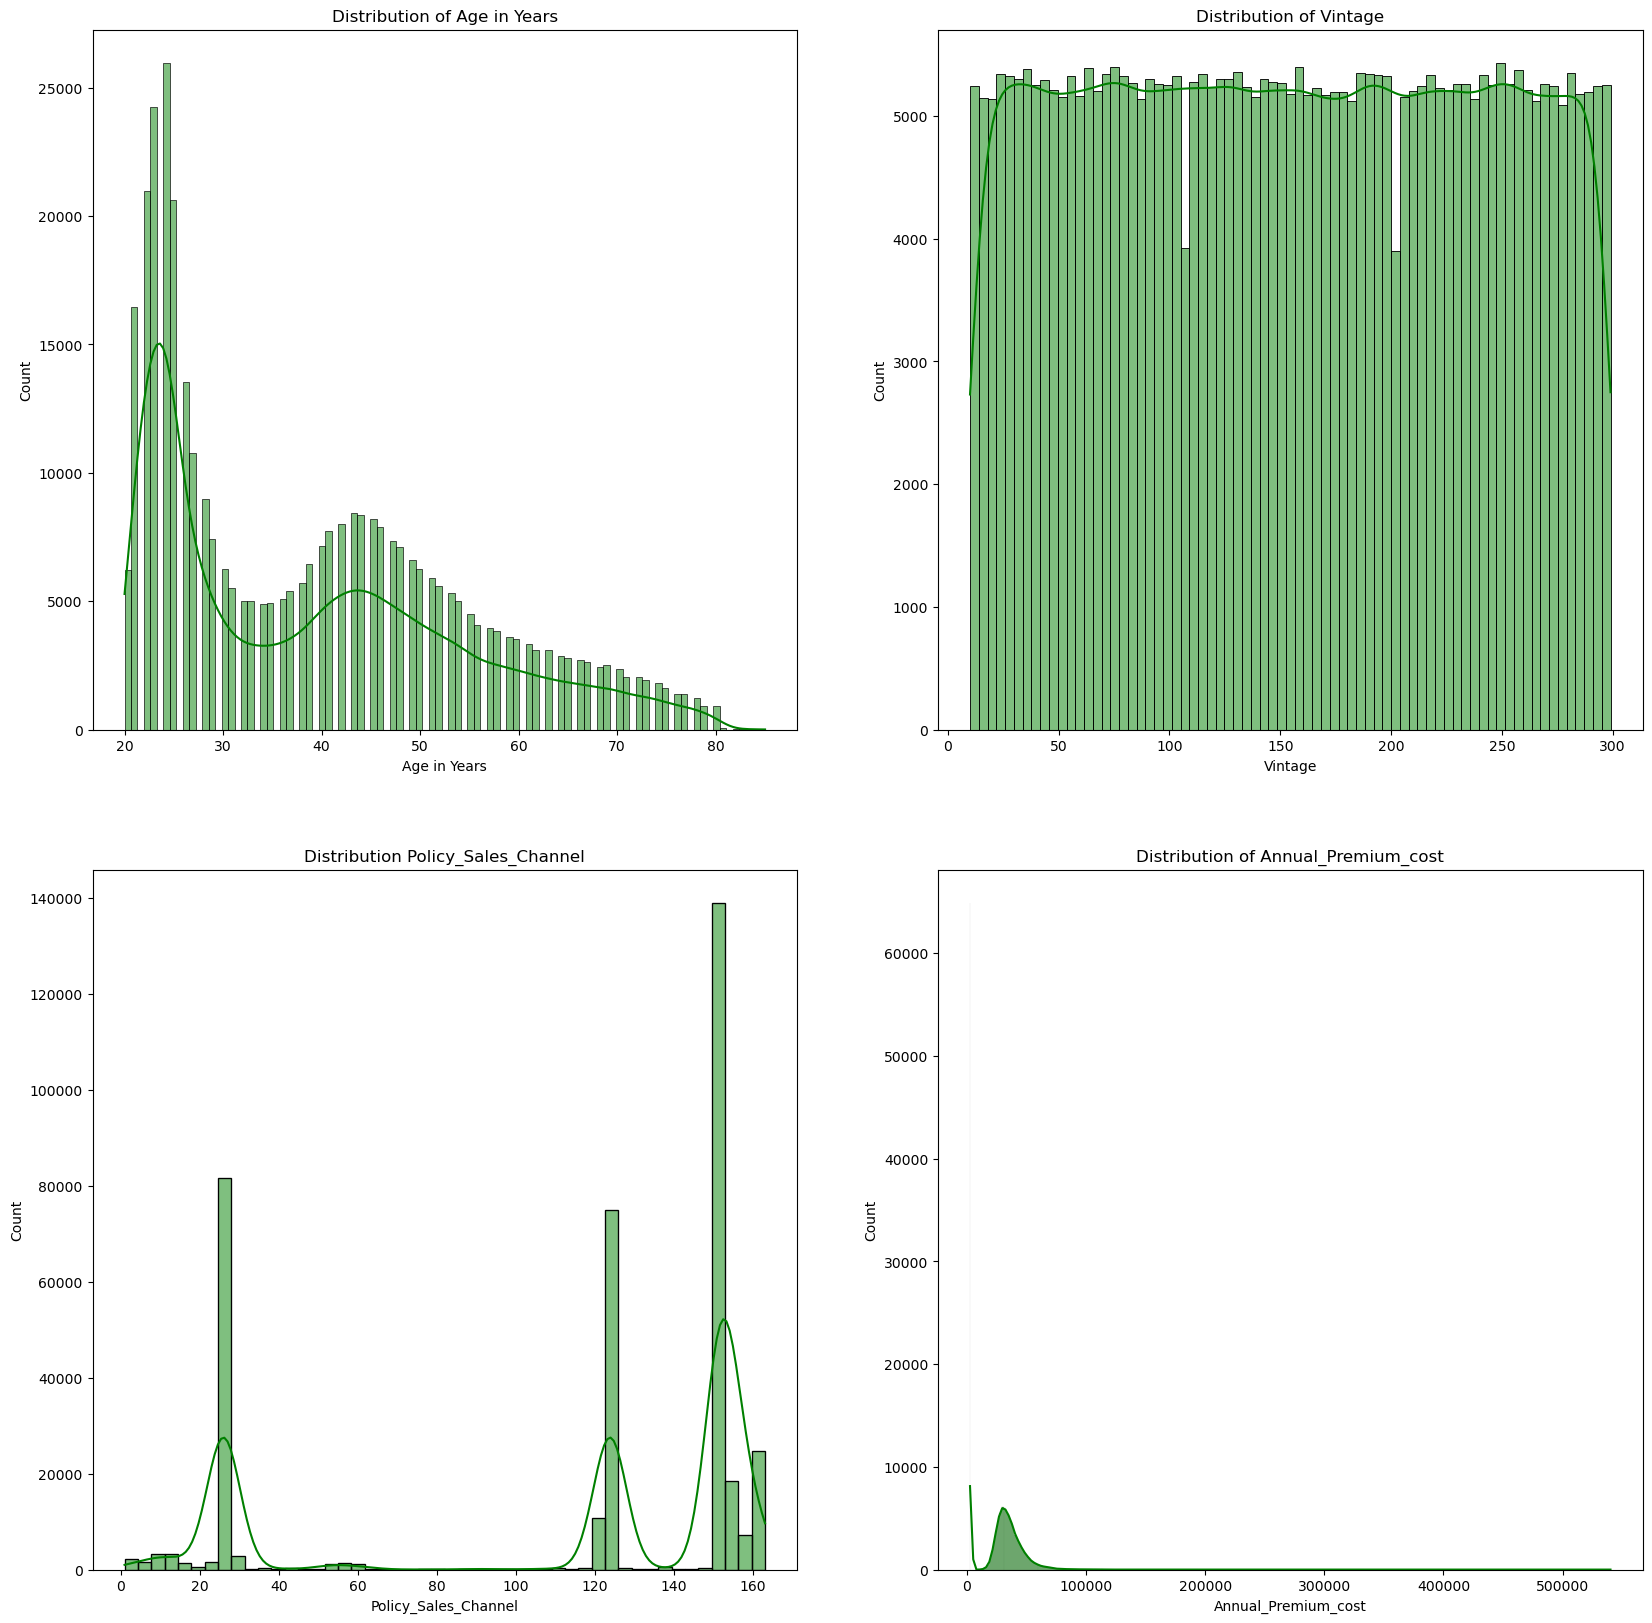

In [78]:
fig,axes=py.subplots(nrows=2,ncols=2,figsize=(20,20))
axes = axes.flatten()
sns.histplot(df['Age in Years'], kde=True,color='green',ax=axes[0])
sns.histplot(df['Vintage'], kde=True,color='green',ax=axes[1])
sns.histplot(df['Policy_Sales_Channel'], kde=True,color='green',ax=axes[2])
sns.histplot(df['Annual_Premium_cost'], kde=True,color='green',ax=axes[3])
axes[0].set_title('Distribution of Age in Years')
axes[1].set_title('Distribution of Vintage')
axes[2].set_title('Distribution Policy_Sales_Channel')
axes[3].set_title('Distribution of Annual_Premium_cost')
py.show()


Text(0.5, 1.0, 'Distribution of Age in Years')

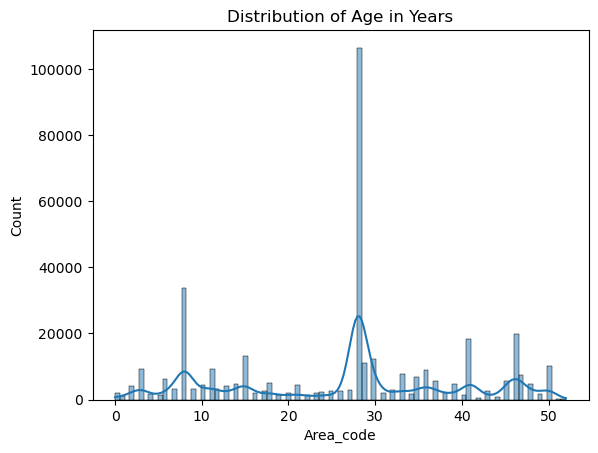

In [4]:
graph=sns.histplot(df['Area_code'], kde=True)
graph.set_title('Distribution of Age in Years')

##### To check Maximum Value of Policy sales channel,Area code and Age.

In [79]:
df['Policy_Sales_Channel'].value_counts()

Policy_Sales_Channel
152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
43          1
144         1
143         1
41          1
Name: count, Length: 155, dtype: int64

In [80]:
df['Age in Years'].value_counts()

Age in Years
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64

In [82]:
df['Area_code'].value_counts()

Area_code
28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
31      1960
23      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: count, dtype: int64

##### Average No. of days policy holder have taken policy

In [5]:
df['Vintage'].mean()

154.34739667654136

### Insights Drawn From These graph

1.We have People From 20 to 80 age Group i.e. wide age distribution, And Most Of Them are from 21 to 25

2.From Vintage Distribution we can say most of the customer are from long time.

3.Most Of The People use 152 policy sales channel

4.Most Of the people pay Moderate amount, while few pay high amount.

5.Most of the policy holder come from area code 28


### count plot for categorical variables

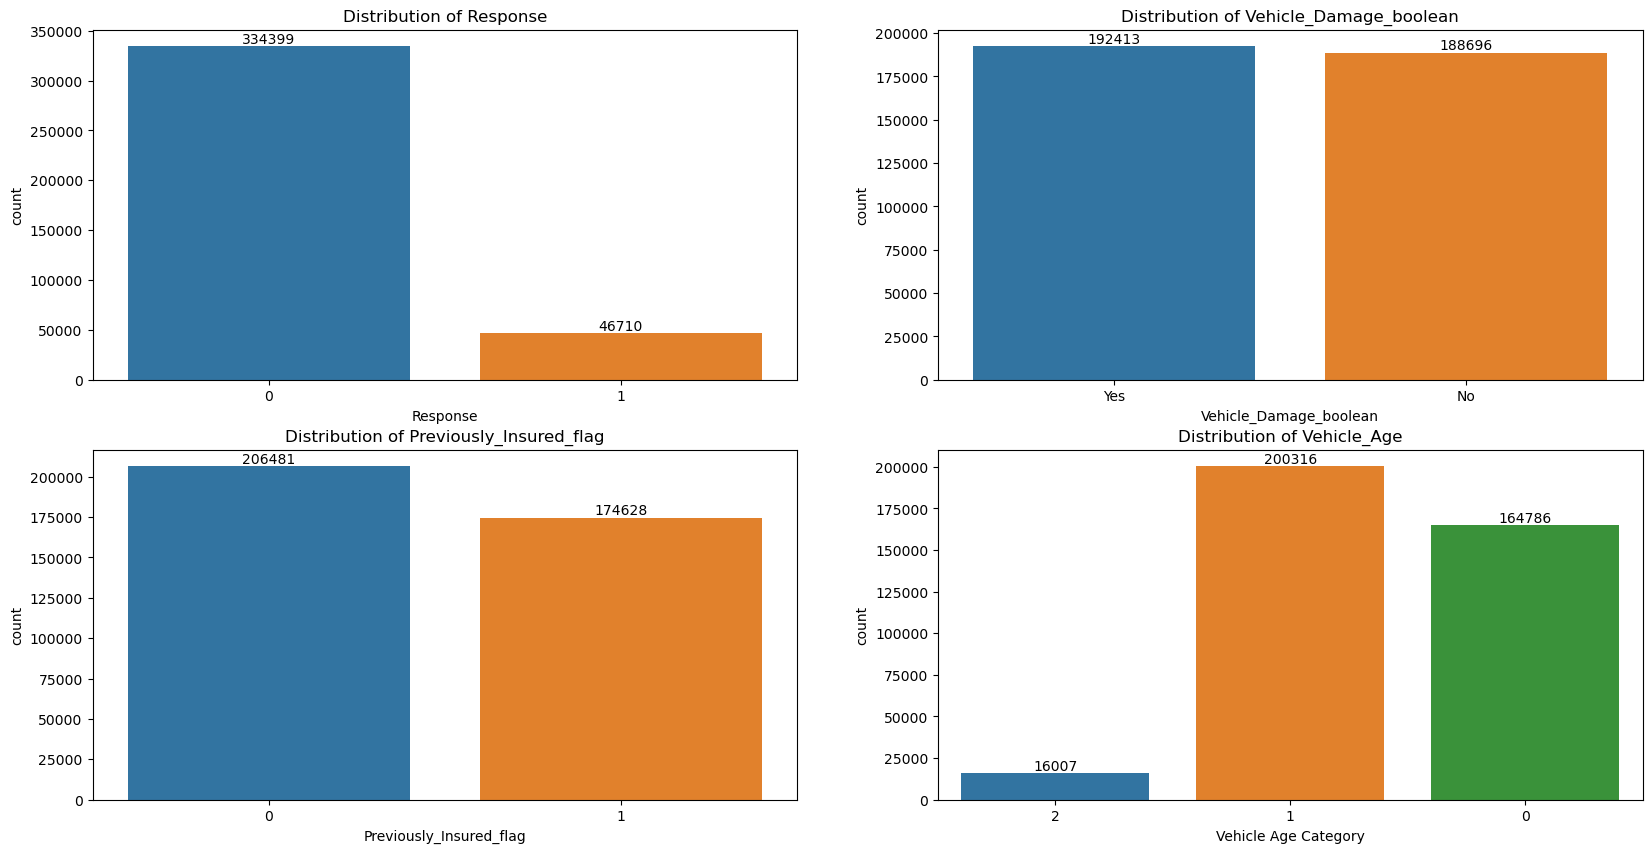

In [83]:
fig, axes = py.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()


graph=sns.countplot(x='Response', data=df, ax=axes[0])
axes[0].set_title('Distribution of Response')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Vehicle_Damage_boolean', data=df, ax=axes[1])
axes[1].set_title('Distribution of Vehicle_Damage_boolean')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Previously_Insured_flag', data=df, ax=axes[2])
axes[2].set_title('Distribution of Previously_Insured_flag')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Vehicle Age Category', data=df, ax=axes[3])
axes[3].set_title('Distribution of Vehicle_Age')
for container in graph.containers:
    graph.bar_label(container)

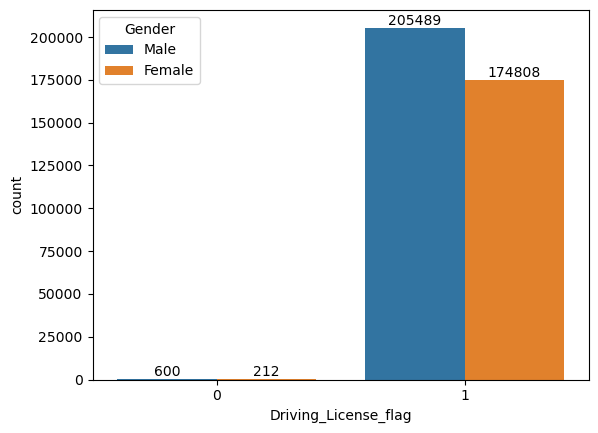

In [84]:
graph=sns.countplot(x='Driving_License_flag', data=df, hue='Gender')
for container in graph.containers:
    graph.bar_label(container)

### Countplot for most of the categorical value with gender distribution

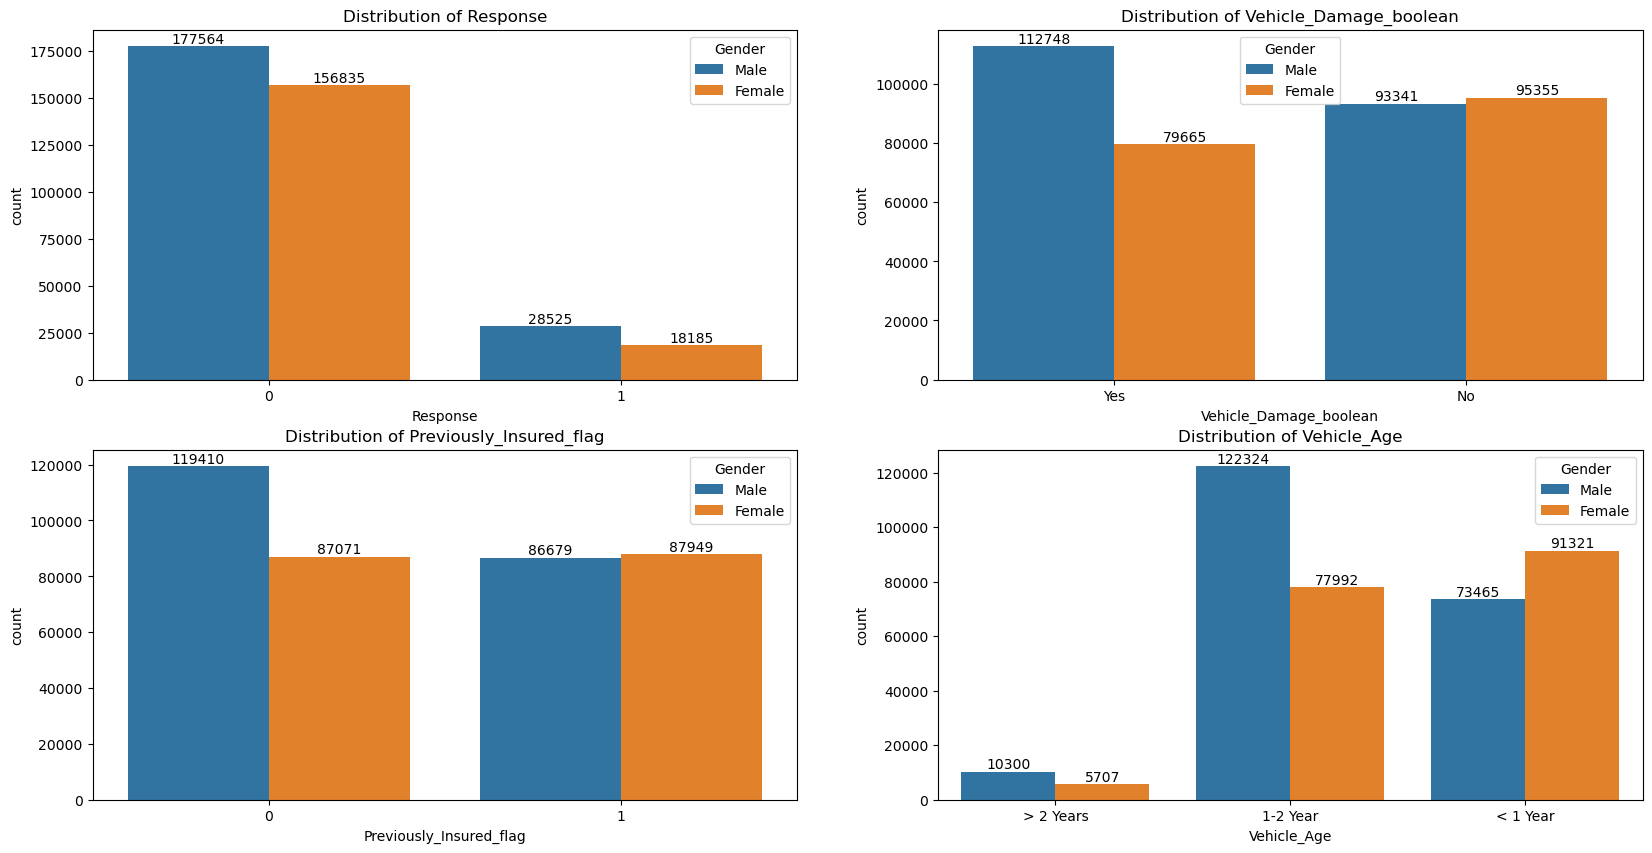

In [85]:
fig, axes = py.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()


graph=sns.countplot(x='Response', data=df, ax=axes[0], hue='Gender')
axes[0].set_title('Distribution of Response')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Vehicle_Damage_boolean', data=df, ax=axes[1], hue='Gender')
axes[1].set_title('Distribution of Vehicle_Damage_boolean')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Previously_Insured_flag', data=df, ax=axes[2], hue='Gender')
axes[2].set_title('Distribution of Previously_Insured_flag')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Vehicle_Age', data=df, ax=axes[3], hue='Gender')
axes[3].set_title('Distribution of Vehicle_Age')
for container in graph.containers:
    graph.bar_label(container)

### Insights Drawn from these graph

1. Very Few People Don't Have Driving License.
   
2. Very Few People Have Responded To Any offer or Insuracne Plan.Which can lead to less probability of people taking vehicle insurance policy.
 
3. Very few people have vehicle for more than 2 year, Less the risk less the chance of taking vehicle insurance policy.
 
4. People who have not taken insurance previously are more compare to people who have taken.

5. People whose vehicle are damaged are more compare to people whose vehicle are not damaged.


### Bivariate Analysis

In [86]:
df.columns

Index(['id', 'Gender', 'Age in Years', 'Driving_License_flag', 'Area_code',
       'Previously_Insured_flag', 'Vehicle_Age', 'Vehicle_Damage_boolean',
       'Annual_Premium_cost', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Age_Group', 'Vehicle Age Category'],
      dtype='object')

### Relationship between important variables

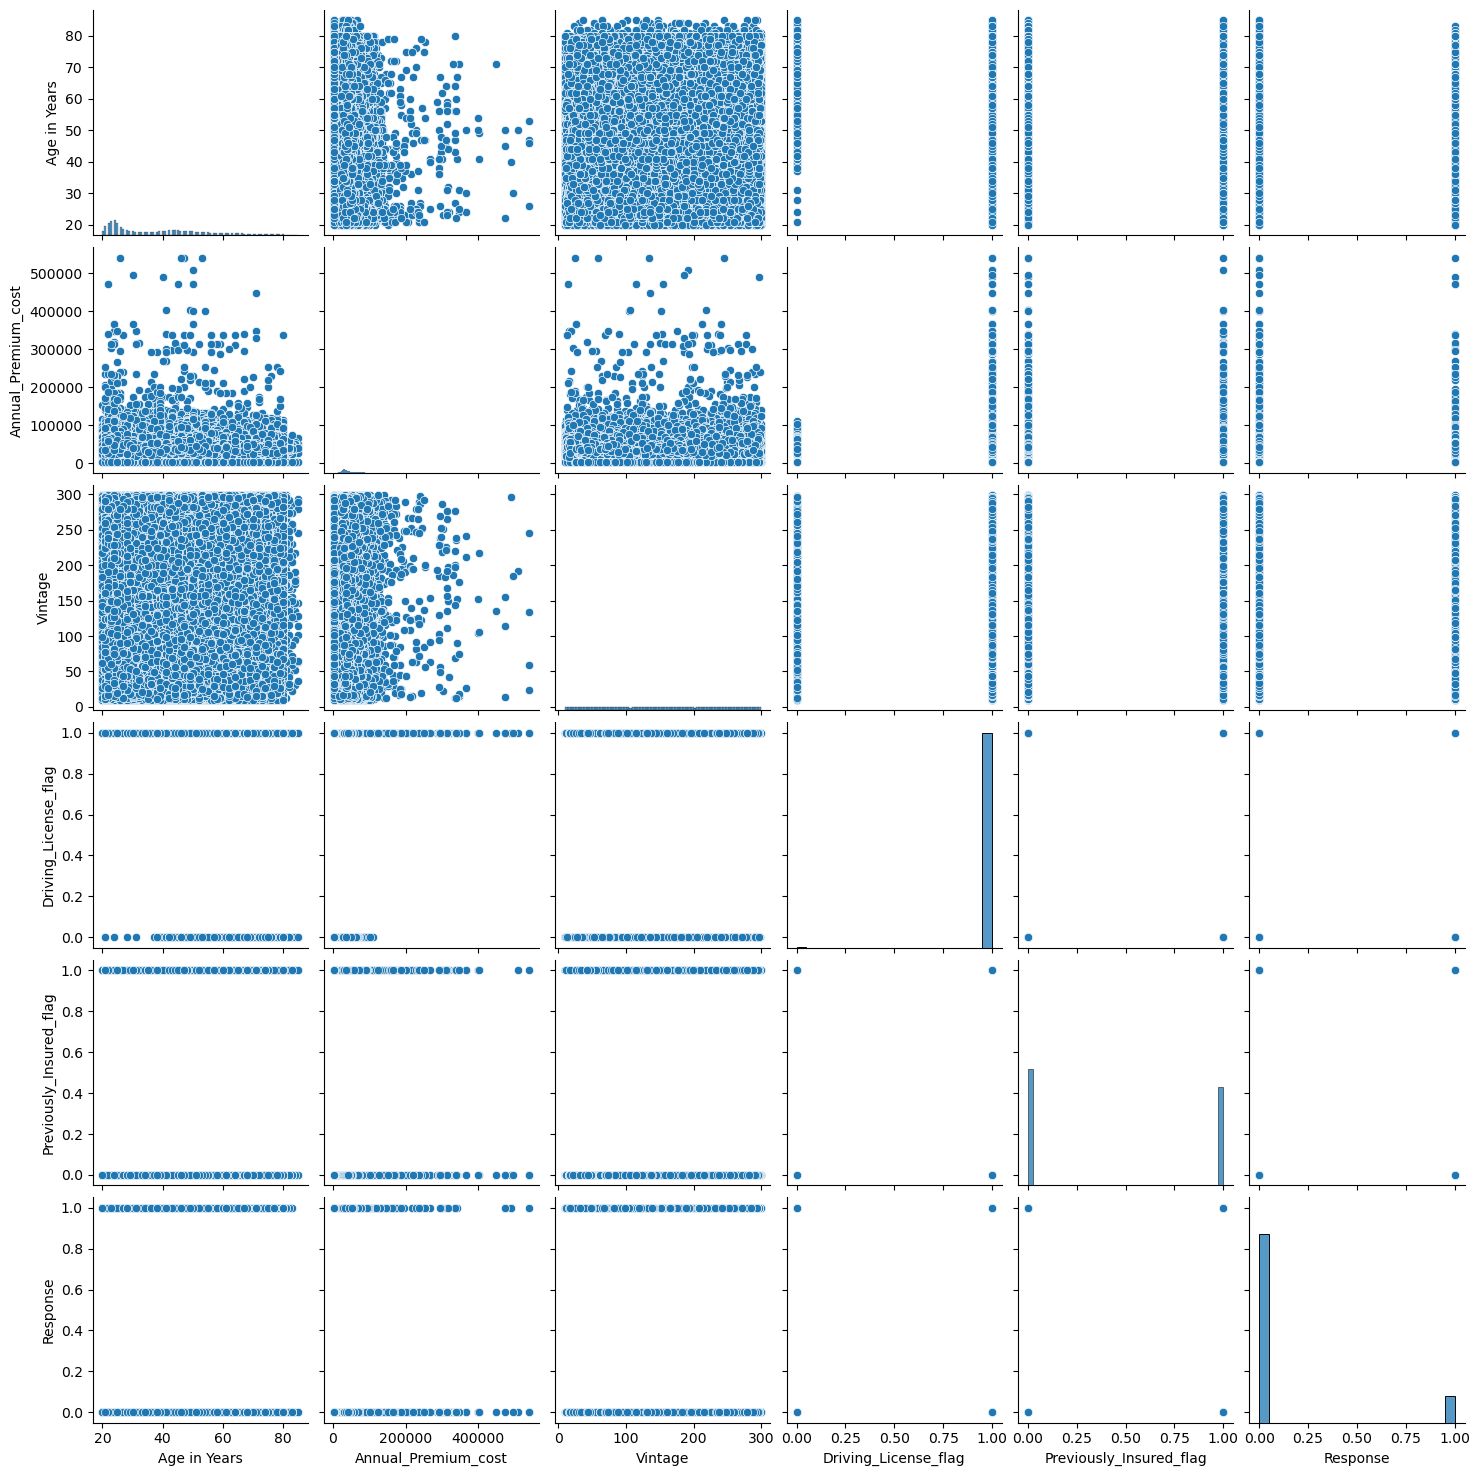

In [87]:
vars = ['Age in Years', 'Annual_Premium_cost', 'Vintage', 'Driving_License_flag', 'Previously_Insured_flag', 'Response']
sns.pairplot(df[vars])

##### Relationship between vehicle age and annual premium.

It is same as seen in other analysis, That most of policy holder pay moderate amount and few pay high amount. Vehicle age does make much difference

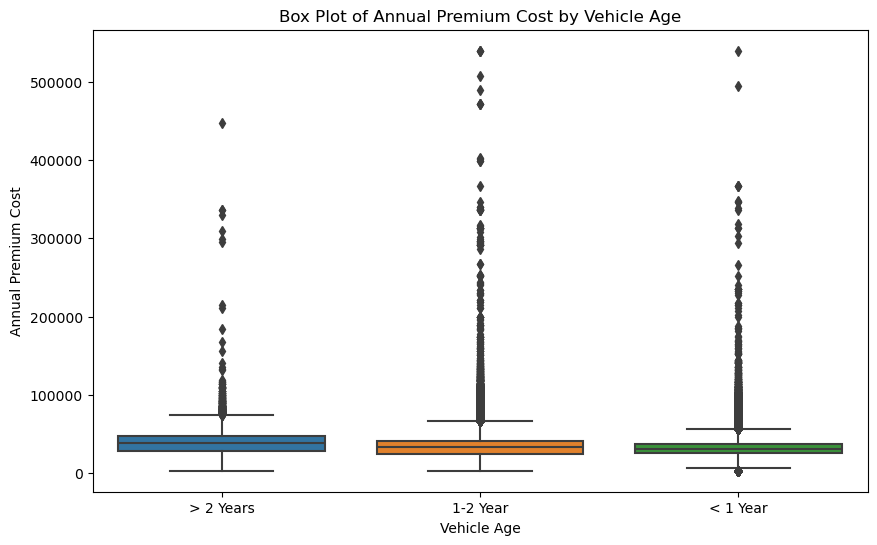

In [8]:
py.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Age', y='Annual_Premium_cost', data=df)
py.title('Box Plot of Annual Premium Cost by Vehicle Age')
py.xlabel('Vehicle Age')
py.ylabel('Annual Premium Cost')
py.show()

In [88]:
vars=['Age in Years', 'Annual_Premium_cost', 'Vintage', 'Driving_License_flag', 'Previously_Insured_flag', 'Response',]
corr=df[vars].corr()

<Axes: >

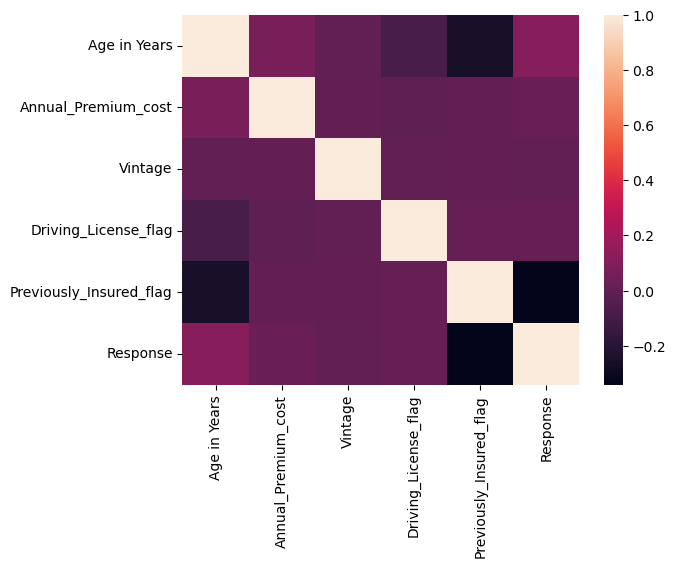

In [16]:
sns.heatmap(corr)

1. Few People Who Pay High Amount are Previously insured.

2. Response Has Weak corelation with other varialbes.


#### making new column where Previously_Insured_flag and response are of string data type

In [89]:
Previously_insured = {0: 'No', 1: 'Yes'}
df['Previously insured'] = df['Previously_Insured_flag'].map(Previously_insured)

Responded = {0: 'No', 1: 'Yes'}
df['Responded'] = df['Response'].map(Responded)


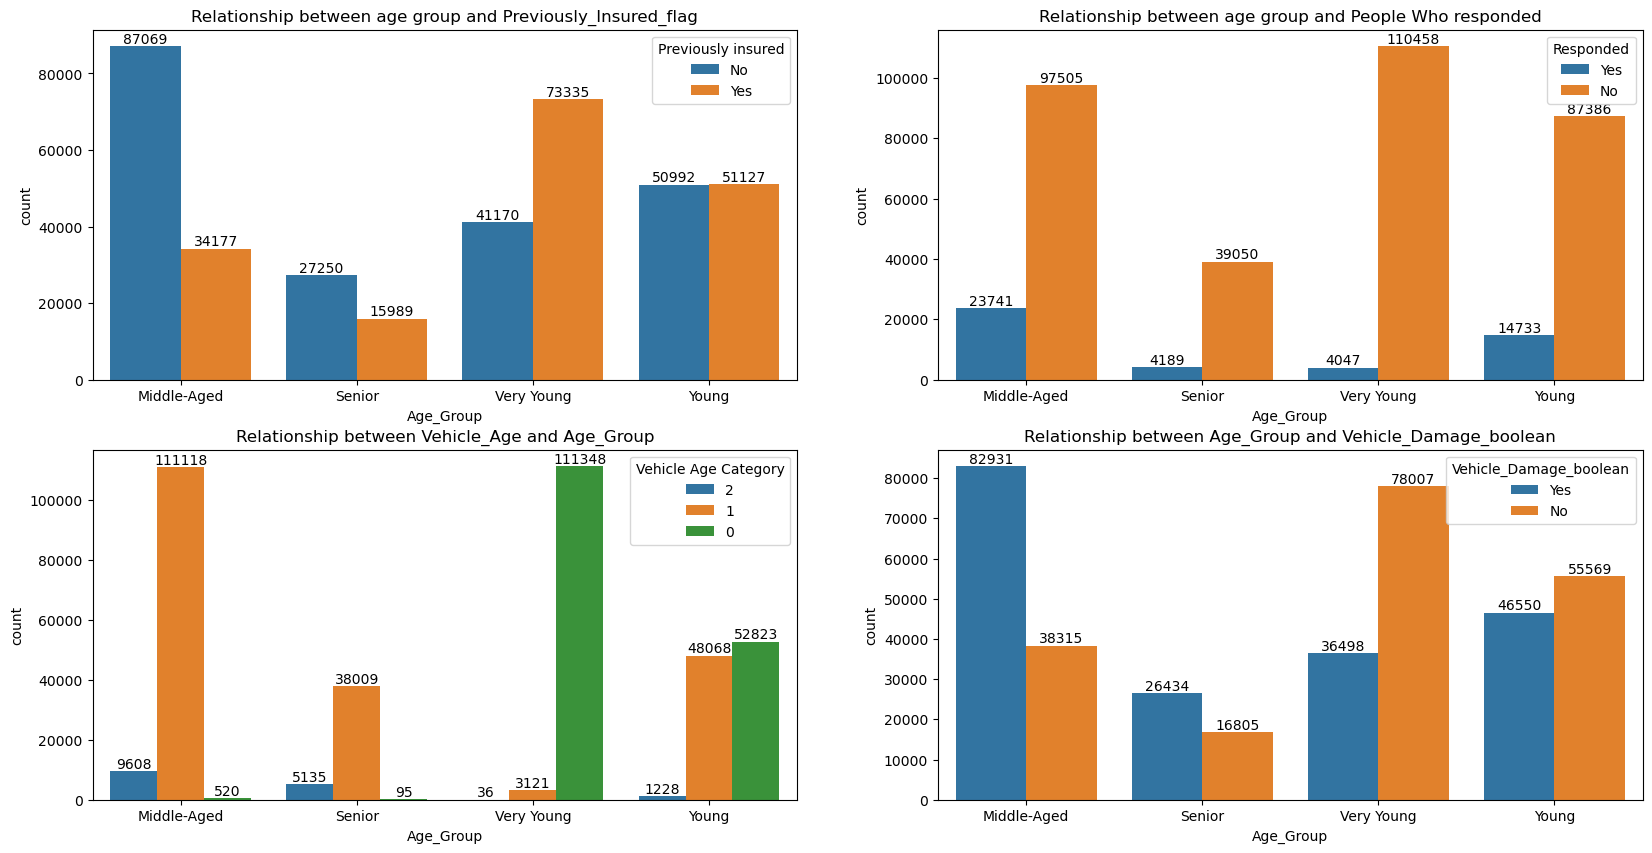

In [90]:
fig, axes = py.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

graph=sns.countplot(x='Age_Group', data=df, ax=axes[0], hue='Previously insured')
axes[0].set_title('Relationship between age group and Previously_Insured_flag')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Age_Group', data=df, ax=axes[1], hue='Responded')
axes[1].set_title('Relationship between age group and People Who responded')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Age_Group', data=df, ax=axes[2], hue='Vehicle Age Category')
axes[2].set_title('Relationship between Vehicle_Age and Age_Group')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Age_Group',data=df,ax=axes[3],hue='Vehicle_Damage_boolean')
axes[3].set_title('Relationship between Age_Group and Vehicle_Damage_boolean')
for container in graph.containers:
    graph.bar_label(container)

1. People Who Have responded, previous Insurance are very young i.e. 21-25.And Also most of the people who have vehicle less than 1 year are very young.

2. But Those Who Have reported most of the vehicle damage are middle aged i.e. 41-60.

3. Those Who Have previuosly are the people whose vehicle is less than 1 year

   With This Analysis We Can Target People Who are from 21-25.

   Now To Check Whether Vehicle Age Can Play An Important Role Or not we need Check The Relation between the vehicle age category,vehicle damage,Response,Previously insured.

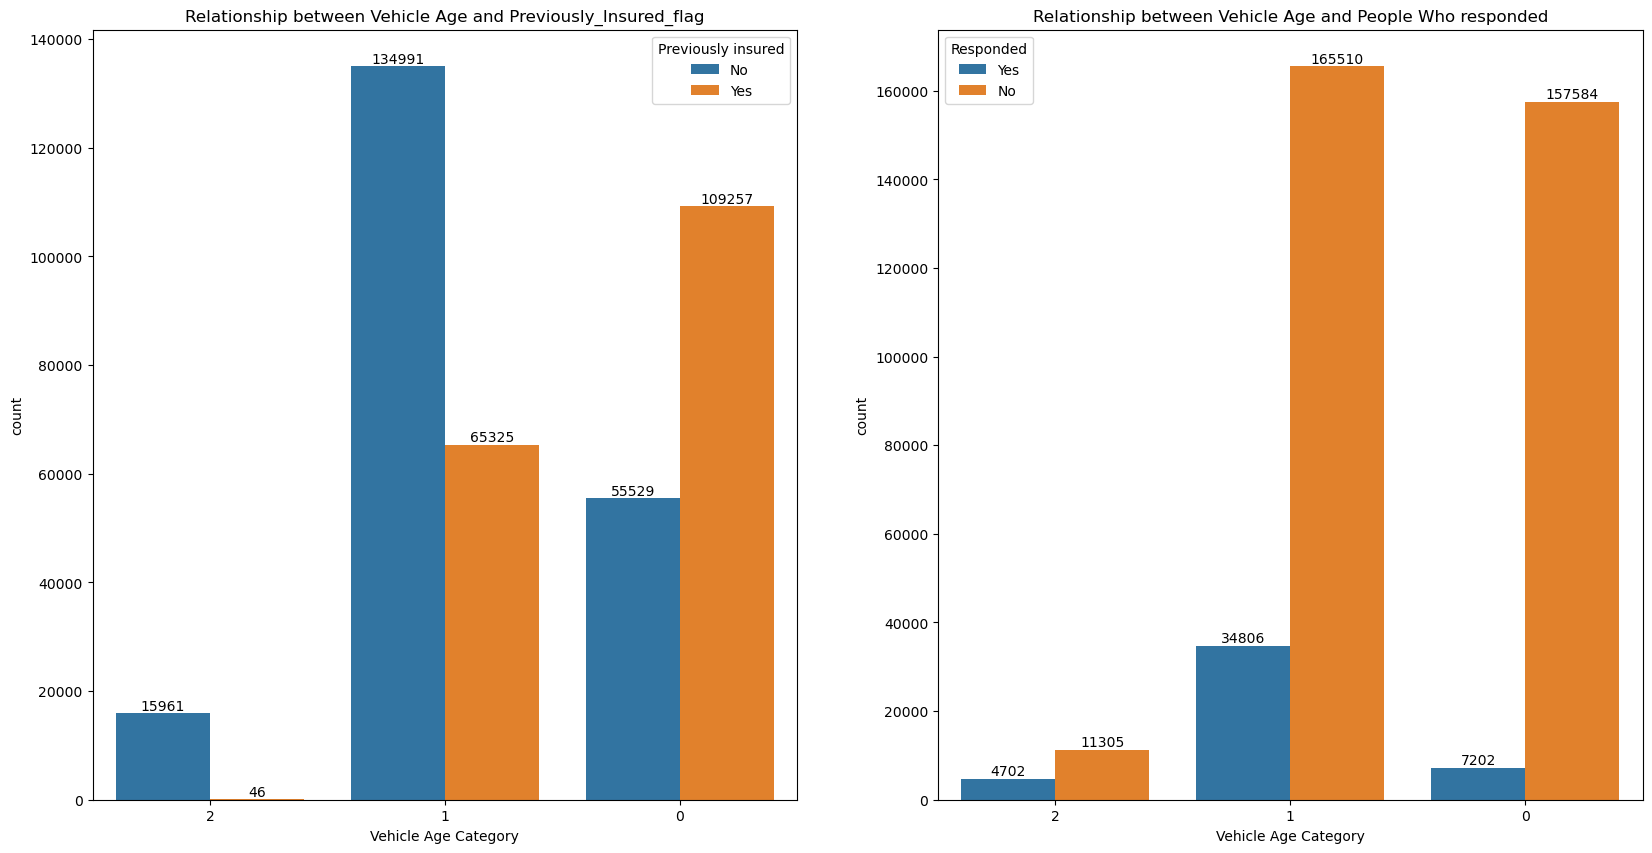

In [91]:
fig, axes = py.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flatten()

graph=sns.countplot(x='Vehicle Age Category', data=df, ax=axes[0], hue='Previously insured')
axes[0].set_title('Relationship between Vehicle Age and Previously_Insured_flag')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Vehicle Age Category', data=df, ax=axes[1], hue='Responded')
axes[1].set_title('Relationship between Vehicle Age and People Who responded')
for container in graph.containers:
    graph.bar_label(container)


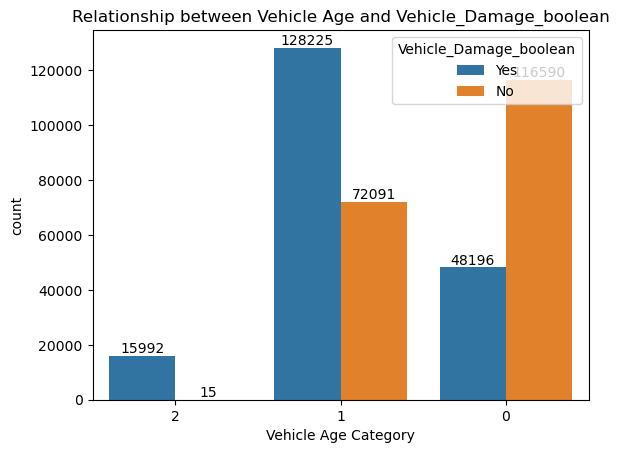

In [92]:
graph=sns.countplot(x='Vehicle Age Category', data=df, hue='Vehicle_Damage_boolean')
graph.set_title('Relationship between Vehicle Age and Vehicle_Damage_boolean')
for container in graph.containers:
    graph.bar_label(container)

We can Target vehicle who is age is less 2 year. That Vehicle of less or more than one Year. That Can be Because Most of Our Policy holder's vehicle age is from 0-2 yr.

##### Average annual premium for previously insured vs. not previously insured policyholders.

There is not much difference between Average Annual Premium for Previously Insured vs. Not Previously Insured 

In [9]:
mean_premiums = df.groupby('Previously_Insured_flag')['Annual_Premium_cost'].mean()
print("Average Annual Premium for Previously Insured vs. Not Previously Insured:")
print(mean_premiums)


Average Annual Premium for Previously Insured vs. Not Previously Insured:
Previously_Insured_flag
0    30496.815760
1    30644.289198
Name: Annual_Premium_cost, dtype: float64


## Important Insights From EDA Report.

1. There is No missing Value   
2. There are 269 Duplicated Rows
3. There is not much imbalance between gender.
4. Most Of the people have driving license
5. People Who Have responded to our policy are very less i.e. 12.25%
6. People Those Who Have reported vehicle damage are more and they are middle aged or whose vehicle age is more than 1 year and both.
7. Most of our customer are from the age group of 21-30.
8. From Vintage Distribution we can say most of the customer are from long time.
9. Most Of The People use 152 policy sales channel.
10. Most Of the people pay Moderate amount, while few pay high amount.
11. People who have not taken insurance previously are more compare to people who have taken.
12. Few People Who Pay High Amount are Previously insured.
13. Response Has Weak corelation with other varialbes.
14. Most Of Our Policy Holder Have Vehicle age from 0-2 yr and they are from 21-25 age group.



## Conclusion

We can Target People Who has recently purchased or going to purchase vehicle. And Those who are in there 20s.

We can Make a column Which Gives Us a problality of each person taking Our Vehicle Insurance Policy.

The Important Feature Can be Response,Previously Insuransed,Vehicle Damage,People in their 20s,Driving license and Vehicle Age

0.6 Will be Good Score.



In [94]:
conditions = {
    'Response': df['Response'] == 1,
    'Age in Years': df['Age in Years'].between(21, 30),
    'Vehicle_Damage_boolean': df['Vehicle_Damage_boolean'] == 'Yes',
    'Vehicle_Age': df['Vehicle_Age'].isin(['< 1 Year', '1-2 Year']),
    'Previously_Insured_flag': df['Previously_Insured_flag'] == 1,
    'Driving_License_flag':df['Driving_License_flag']==1
}

In [95]:
# Calculate probability score
df['Probability_of_Taking_Insurance'] = sum(conditions.values()) / len(conditions)

In [96]:
# Display the updated DataFrame with relevant columns
probality=df[['Response', 'Age in Years', 'Vehicle_Damage_boolean', 'Vehicle_Age', 
                     'Previously_Insured_flag', 'Driving_License_flag','Probability_of_Taking_Insurance']]
probality.head(10).round(1)

,Response,Age in Years,Vehicle_Damage_boolean,Vehicle_Age,Previously_Insured_flag,Driving_License_flag,Probability_of_Taking_Insurance
0,1,44,Yes,> 2 Years,0,1,0.5
1,0,76,No,1-2 Year,0,1,0.3
2,1,47,Yes,> 2 Years,0,1,0.5
3,0,21,No,< 1 Year,1,1,0.7
4,0,29,No,< 1 Year,1,1,0.7
5,0,24,Yes,< 1 Year,0,1,0.7
6,0,23,Yes,< 1 Year,0,1,0.7
7,1,56,Yes,1-2 Year,0,1,0.7
8,0,24,No,< 1 Year,1,1,0.7
9,0,32,No,< 1 Year,1,1,0.5


### Drawing count plot for Probability_of_Taking_Insurance

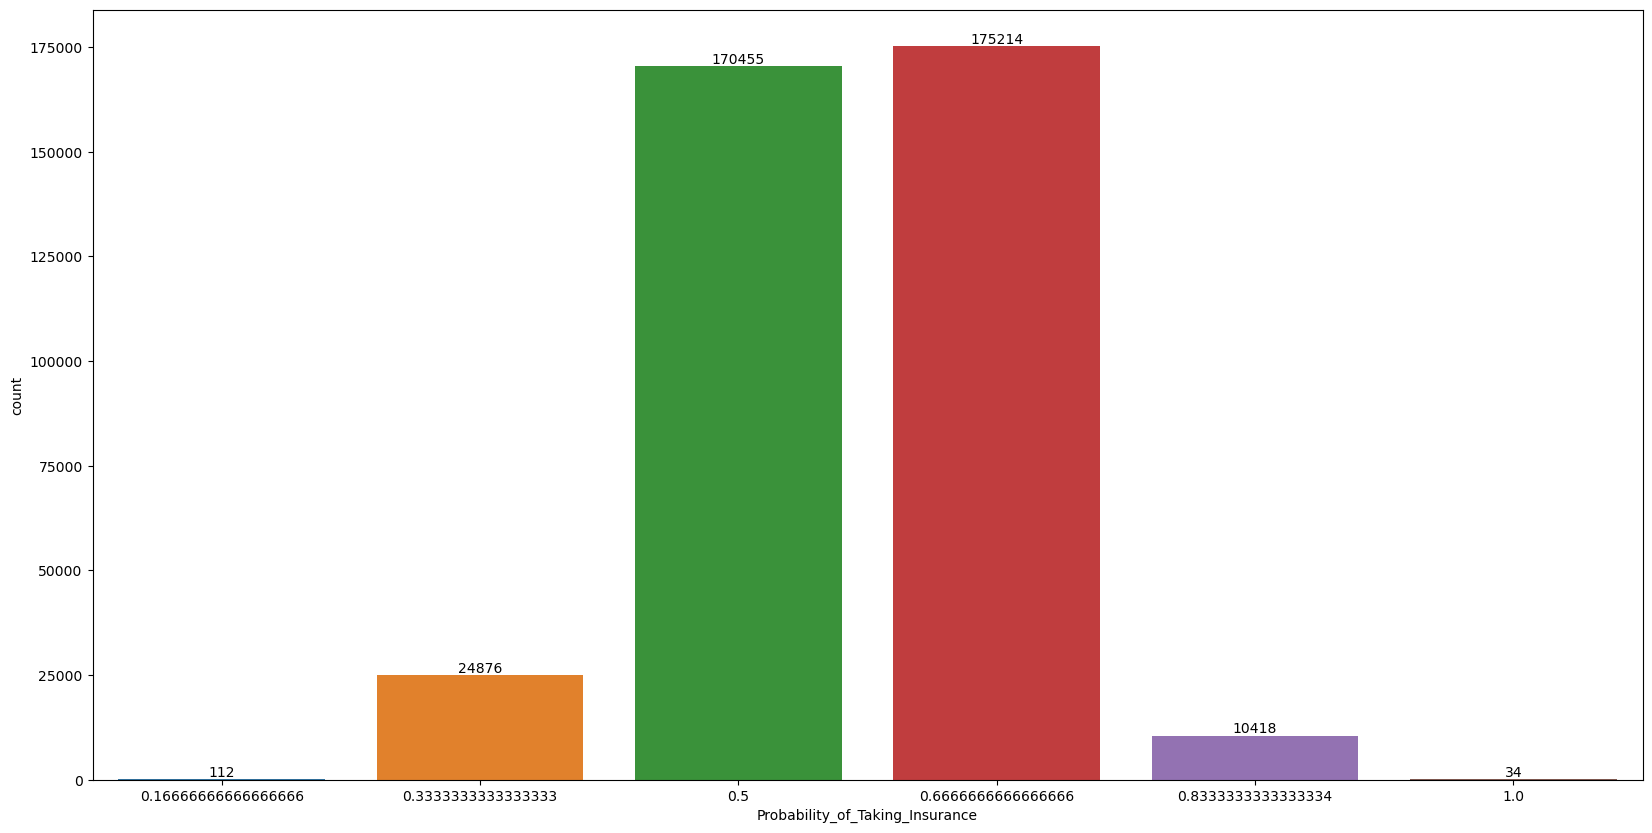

In [97]:
fig, axes = py.subplots(nrows=1, ncols=1, figsize=(20, 10))
graph=sns.countplot(x='Probability_of_Taking_Insurance', data=df)
for container in graph.containers:
    graph.bar_label(container)

### Atleast 34 people will take vehicle insurance i.e. 0.008%